In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]

In [4]:
import radio as rio
import torchio as tio
from pathlib import Path
from radio.settings.pathutils import is_dir_or_symlink

#### Setup Paths

In [5]:
klu_dir = Path('/media/cerebro/Studies/KLU_APC2/Public/Analysis/data')
subject_id = '900534'
scan_id = '800569'
step = 'step06_WMHz_new'

#### Check Paths

In [6]:
subject_dir = klu_dir / subject_id
scan_dir = subject_dir / scan_id
step_dir = scan_dir / step
t1_path = klu_dir / step_dir / 'T1.nii'
flair_path = klu_dir / step_dir / f"{scan_id}_FLAIR.nii"
wmh_path = klu_dir / step_dir / f"{scan_id}_FLAIR_wmh.nii"
print("Does study directory exists? " + ("Yep." if klu_dir.is_dir() else "Nope."))
print("Does subject directory exists? " + ("Yep." if subject_dir.is_dir() else "Nope."))
print("Does scan directory exists? " + ("Yep." if scan_dir.is_dir() else "Nope."))
print("Does processing step directory exists? " + ("Yep." if step_dir.exists() else "Nope."))
print("Does T1 file exist? " + ("Yep." if t1_path.is_file() else "Nope."))
print("Does FLAIR file exist? " + ("Yep." if flair_path.is_file() else "Nope."))
print("Does the wmh mask file exist? " + ("Yep." if wmh_path.is_file() else "Nope."))

Does study directory exists? Yep.
Does subject directory exists? Yep.
Does scan directory exists? Yep.
Does processing step directory exists? Yep.
Does T1 file exist? Yep.
Does FLAIR file exist? Yep.
Does the wmh mask file exist? Yep.


#### torchIO Subject

In [7]:
subject_dict = {
    't1': tio.ScalarImage(t1_path),
    'flair': tio.ScalarImage(flair_path),
    'wmh': tio.LabelMap(wmh_path),
    'id': subject_id,
    'scan_id': scan_id,
}

subject = tio.Subject(subject_dict)

In [8]:
subject_images = subject.get_images()
subject_images

[ScalarImage(shape: (1, 256, 256, 256); spacing: (1.00, 1.00, 1.00); orientation: LIA+; path: "/media/cerebro/Studies/KLU_APC2/Public/Analysis/data/900534/800569/step06_WMHz_new/T1.nii"),
 ScalarImage(shape: (1, 212, 256, 48); spacing: (1.00, 1.00, 3.00); orientation: LAS+; path: "/media/cerebro/Studies/KLU_APC2/Public/Analysis/data/900534/800569/step06_WMHz_new/800569_FLAIR.nii")]

In [9]:
t1_spatial_shape = subject_images[0].spatial_shape

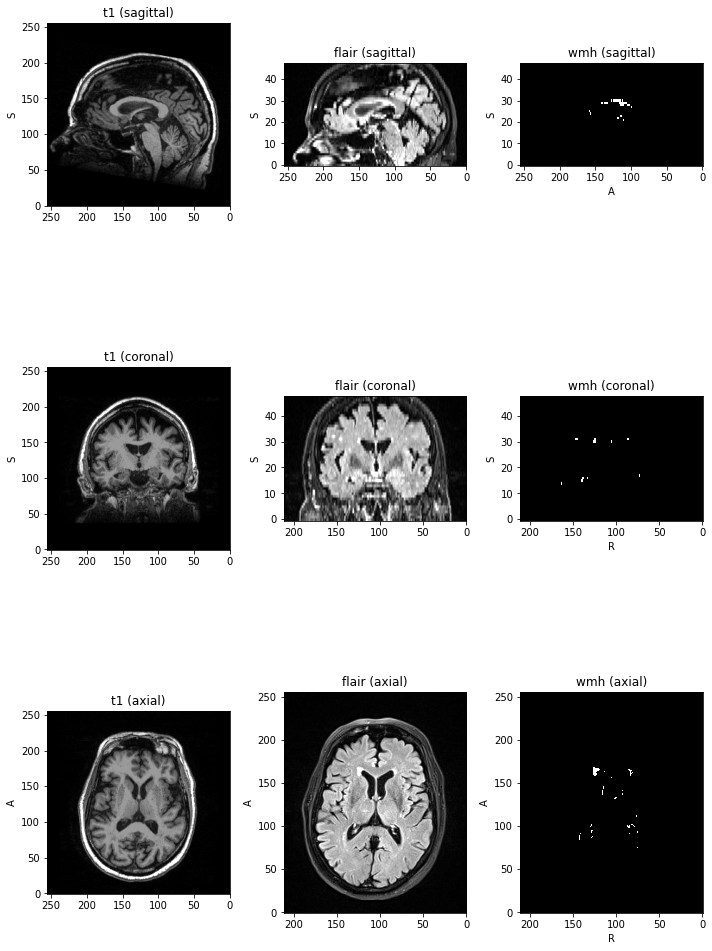

In [10]:
subject.plot()